## Implementing of the K-Nearest Neighbor Classifier for Binary Classification Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image

In [2]:
dataset=make_classification(n_samples=1000,n_features=4)

In [3]:
X=dataset[0]
y=dataset[1]

In [4]:
X.shape

(1000, 4)

Text(0.5, 1.0, 'Classified All Data')

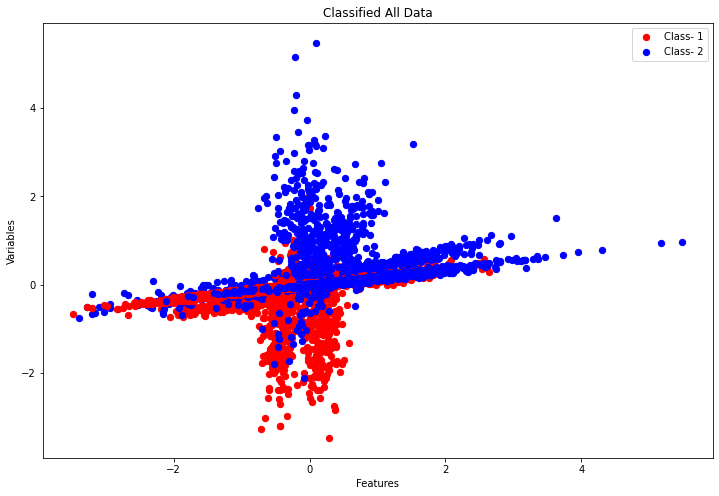

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 40, c = 'red', label = 'Class- 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 40, c = 'blue', label = 'Class- 2')

plt.scatter(X[y == 0, 1], X[y == 0, 2], s = 40, c = 'red')
plt.scatter(X[y == 1, 1], X[y == 1, 2], s = 40, c = 'blue')

plt.scatter(X[y == 0, 2], X[y == 0, 3], s = 40, c = 'red')
plt.scatter(X[y == 1, 2], X[y == 1, 3], s = 40, c = 'blue')
plt.legend()
plt.xlabel('Features')
plt.ylabel('Variables')
plt.title('Classified All Data')

Text(0.5, 1.0, 'Unclassified All Data')

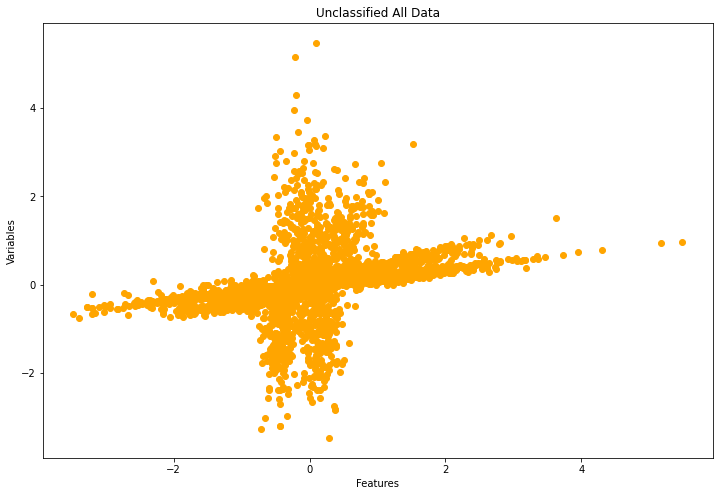

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c='orange')
plt.scatter(X[:,1],X[:,2],c='orange')
plt.scatter(X[:,2],X[:,3],c='orange')
plt.xlabel('Features')
plt.ylabel('Variables')
plt.title('Unclassified All Data')

In [7]:
sc= StandardScaler()
X=sc.fit_transform(X)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

#### Description of the K-Nearest Neighbors Regressor

* **#1** Find the distance between each test data and the training data with **metric_distance()** method.
* **#2** Sort the distances with y_train in **predict()** method
* **#3** Limit the distances ordered from lowest to highest by the number of neighbors.

     Whichever binary value has the most in the y_train data stack arriving at the leaf node, that value is returned in **predict()**.




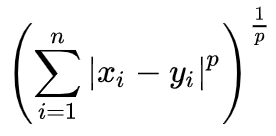

In [9]:
Image.open('Figures/minkowski.png')

Calculation of the distance formula, when **p=2** equals to minkowski distance

In [24]:
class KNeighborsClassifier_mine():
    
    def __init__(self,n_neighbors=5,metric='minkowski',p=2):
        
        self.n_neighbors=n_neighbors
        self.metric=metric 
        self.p=p
        
    def metric_distance(self,x_test,X_train):
    # Euclidean distance between points a & data
        return np.power(np.sum(abs(x_test - X_train)**self.p, axis=1,dtype=float),1./self.p) 
    
    
    def predict(self,X_test):
    
        labels=np.zeros(X_test.shape[0])
        for idx,x_test in enumerate(X_test):
        
            neighbors=[]
            distances =self.metric_distance(x_test,self.X_train)
            sorted_=[y_train for dist,y_train in sorted(zip(distances,self.y_train))]
            neighbors=sorted_[:self.n_neighbors]
            labels[idx]=max(neighbors,key=neighbors.count)
        
        return labels
    
    def fit(self,X_train,y_train):
        
        self.X_train=X_train
        self.y_train=y_train
        
    
    

#### Hand-made Results

In [44]:
from sklearn.metrics import accuracy_score,jaccard_score,f1_score,confusion_matrix
import seaborn as sns 

In [29]:
model=KNeighborsClassifier_mine(n_neighbors=5)

In [30]:
model.fit(X_train,y_train)

In [31]:
yhat_mine=model.predict(X_test)

In [45]:
f1_score(y_test,yhat_mine)

0.8990825688073395

In [46]:
accuracy_score(y_test,yhat_mine)

0.9

In [47]:
jaccard_score(y_test,yhat_mine)

0.8166666666666667

In [48]:
cm_mine=confusion_matrix(y_test,yhat_mine)

#### Plots Hand-made

[Text(0.5, 51.0, 'Actual Values'), Text(87.0, 0.5, 'Predicted Values')]

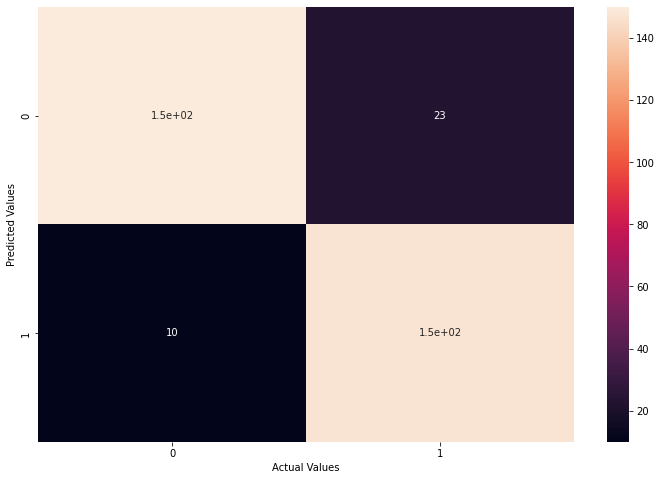

In [49]:
fig=plt.figure(figsize=(12,8))
fig=sns.heatmap(cm_mine,annot=True)
fig.set(xlabel='Actual Values', ylabel='Predicted Values')

Text(0.5, 1.0, 'Classified Predict Data (Hand-made)')

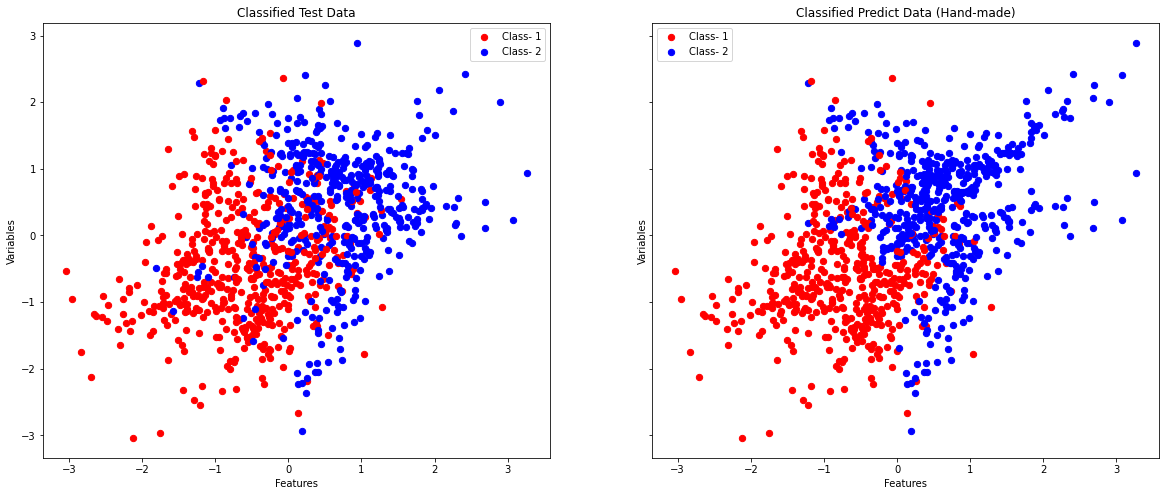

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))
ax1.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax1.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax1.scatter(X_test[y_test == 0, 1], X_test[y_test == 0, 2], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 1], X_test[y_test == 1, 2], s = 40, c = 'b')

ax1.scatter(X_test[y_test == 0, 2], X_test[y_test == 0, 3], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 2], X_test[y_test == 1, 3], s = 40, c = 'b')

ax1.legend()
ax1.set_xlabel('Features')
ax1.set_ylabel('Variables')
ax1.set_title('Classified Test Data')

ax2.scatter(X_test[yhat_mine == 0, 0], X_test[yhat_mine == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax2.scatter(X_test[yhat_mine == 1, 0], X_test[yhat_mine == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax2.scatter(X_test[yhat_mine == 0, 1], X_test[yhat_mine == 0, 2], s = 40, c ='r')
ax2.scatter(X_test[yhat_mine == 1, 0], X_test[yhat_mine == 1, 2], s = 40, c = 'b')

ax2.scatter(X_test[yhat_mine == 0, 2], X_test[yhat_mine == 0, 3], s = 40, c ='r')
ax2.scatter(X_test[yhat_mine == 1, 2], X_test[yhat_mine == 1, 3], s = 40, c = 'b')

ax2.legend()
ax2.set_xlabel('Features')
ax2.set_ylabel('Variables')
ax2.set_title('Classified Predict Data (Hand-made)')

#### Sklearn Results 

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
model=KNeighborsClassifier(n_neighbors=5,p=2)

In [53]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
yhat_sklearn=model.predict(X_test)

In [55]:
f1_score(y_test,yhat_sklearn)

0.8990825688073395

In [56]:
accuracy_score(y_test,yhat_sklearn)

0.9

In [57]:
jaccard_score(y_test,yhat_sklearn)

0.8166666666666667

In [58]:
cm_sklearn=confusion_matrix(y_test,yhat_sklearn)

#### Plots Sklearn

[Text(0.5, 51.0, 'Actual Values'), Text(87.0, 0.5, 'Predicted Values')]

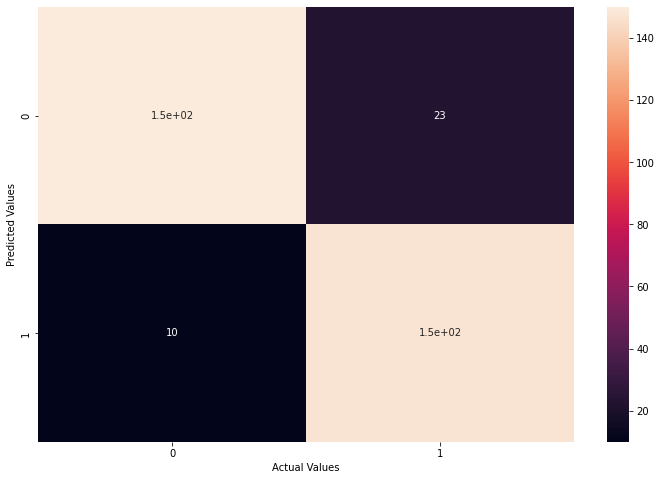

In [61]:
fig=plt.figure(figsize=(12,8))
fig=sns.heatmap(cm_sklearn,annot=True)
fig.set(xlabel='Actual Values', ylabel='Predicted Values')

Text(0.5, 1.0, 'Classified Predict Data (Sklearn)')

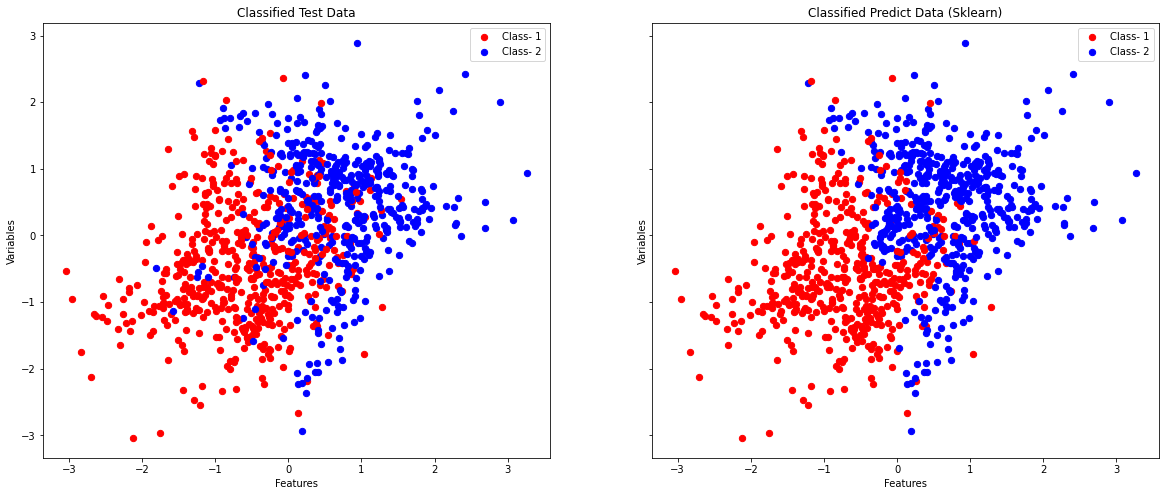

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))
ax1.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax1.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax1.scatter(X_test[y_test == 0, 1], X_test[y_test == 0, 2], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 1], X_test[y_test == 1, 2], s = 40, c = 'b')

ax1.scatter(X_test[y_test == 0, 2], X_test[y_test == 0, 3], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 2], X_test[y_test == 1, 3], s = 40, c = 'b')

ax1.legend()
ax1.set_xlabel('Features')
ax1.set_ylabel('Variables')
ax1.set_title('Classified Test Data')

ax2.scatter(X_test[yhat_sklearn== 0, 0], X_test[yhat_sklearn == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax2.scatter(X_test[yhat_sklearn == 1, 0], X_test[yhat_sklearn == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax2.scatter(X_test[yhat_sklearn == 0, 1], X_test[yhat_sklearn == 0, 2], s = 40, c ='r')
ax2.scatter(X_test[yhat_sklearn == 1, 1], X_test[yhat_sklearn == 1, 2], s = 40, c = 'b')

ax2.scatter(X_test[yhat_sklearn == 0, 2], X_test[yhat_sklearn == 0, 3], s = 40, c ='r')
ax2.scatter(X_test[yhat_sklearn == 1, 2], X_test[yhat_sklearn == 1, 3], s = 40, c = 'b')

ax2.legend()
ax2.set_xlabel('Features')
ax2.set_ylabel('Variables')
ax2.set_title('Classified Predict Data (Sklearn)')